 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns



whale_returns = pd.read_csv("whale_returns.csv", index_col="Date", parse_dates = True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
# another way whale_returns = whale_returns.dropna()
whale_returns.dropna(inplace = True)
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns

algo_returns = pd.read_csv("algo_returns.csv", index_col="Date", parse_dates = True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_returns = algo_returns.dropna()
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_history = pd.read_csv("sp500_history.csv", index_col="Date", parse_dates = True)
sp500_history.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [9]:
# Check Data Types
sp500_history.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1649 entries, 2019-04-23 to 2012-10-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Close   1649 non-null   object
dtypes: object(1)
memory usage: 25.8+ KB


In [10]:
# Fix Data Types
sp500_history.head()
sp500_history["Close"]= sp500_history["Close"].str.replace("$", "")
sp500_history.head()
sp500_history["Close"] = sp500_history["Close"].astype("float")

/Users/michellefesi/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
# Calculate Daily Returns
sp500_history["Close"].pct_change()
sp500_history["Close"]= sp500_history["Close"].pct_change()
sp500_history.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [12]:
# Drop nulls
sp500_history = sp500_history.dropna()
sp500_history.head()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [13]:
# Rename `Close` Column to be specific to this portfolio.
sp500_history.columns=["S&P Returns"]
sp500_history.head()

,S&P Returns
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns
combined_returns = pd.concat([whale_returns, algo_returns, sp500_history])

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_return = pd.concat([whale_returns, algo_returns, sp500_history],axis="columns", join="inner")
combined_return.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

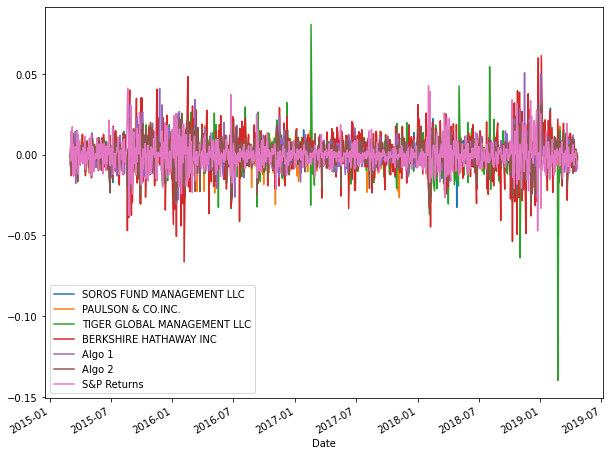

In [15]:
# Plot daily returns of all portfolios
combined_return.plot(figsize=(10,8))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

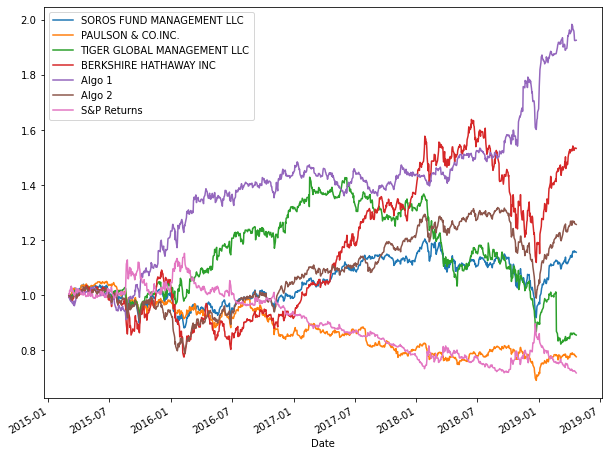

In [16]:
# Calculate cumulative returns of all portfolios
# Plot cumulative returns
cumulative_return = (1+combined_return).cumprod()
cumulative_return.plot(figsize=(10,8))


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

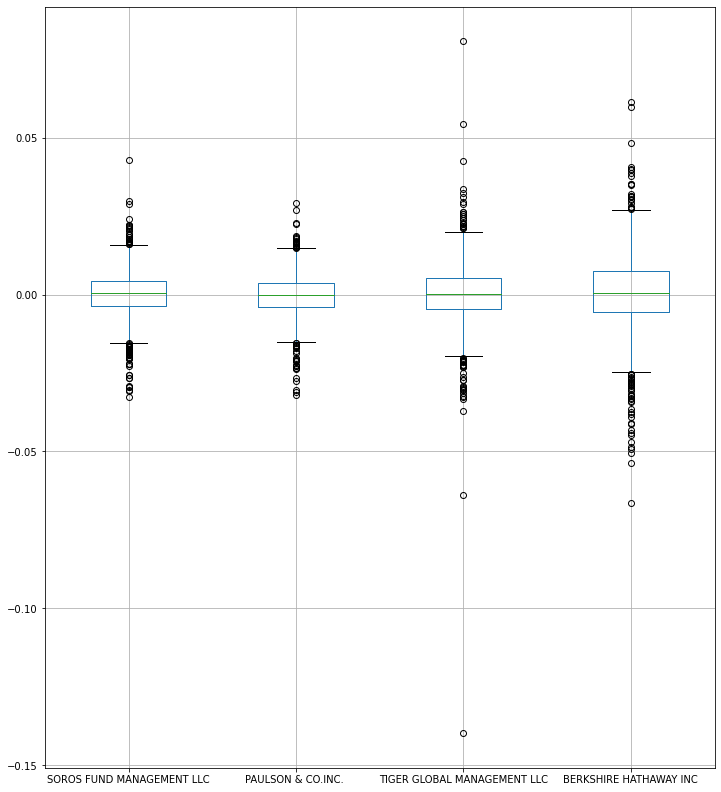

In [17]:
# Box plot to visually show risk
whale_returns.boxplot(figsize=(12,14))


<AxesSubplot:>

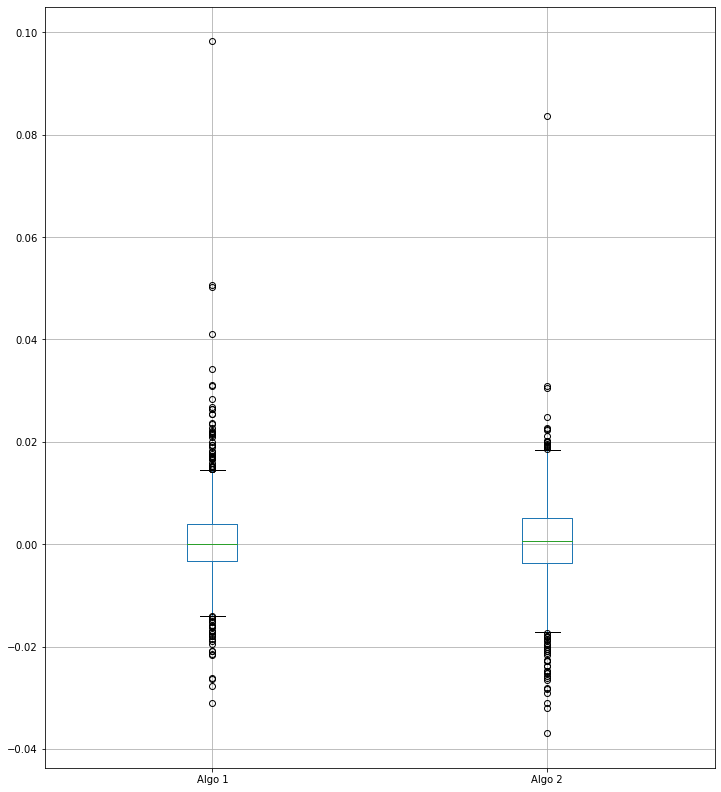

In [18]:
algo_returns.boxplot(figsize=(12,14))

<AxesSubplot:>

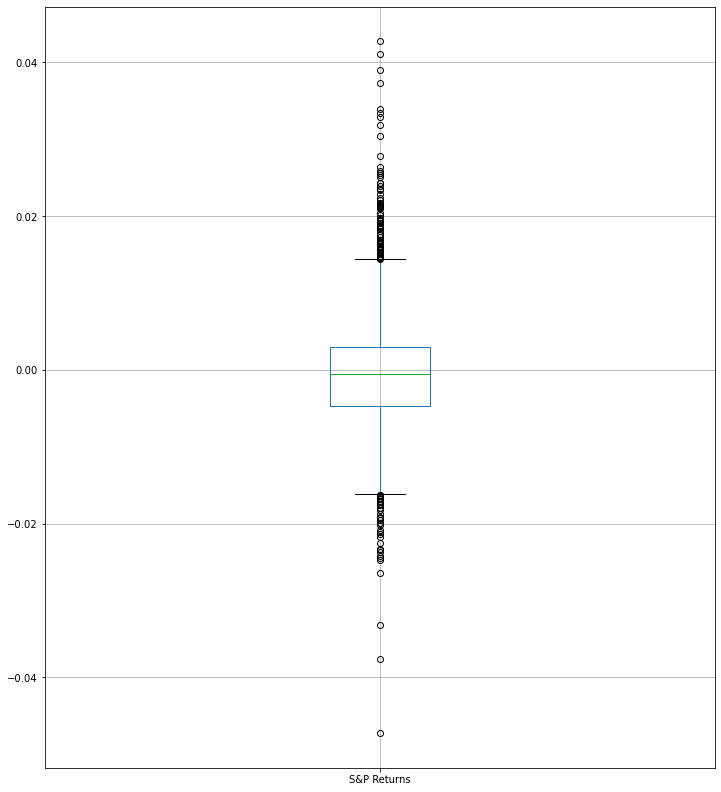

In [19]:
sp500_history.boxplot(figsize=(12,14))

### Calculate Standard Deviations

In [51]:
# Calculate the daily standard deviations of all portfolios
stand_dev_calcs = combined_return.std()
stand_dev_calcs.head(6)

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [42]:
# Calculate  the daily standard deviation of S&P 500
sp500_history.std()
# Determine which portfolios are riskier than the S&P 500
print("The portfolios riskier than the S&P 500 are Tiger Global Management, and Berkshire Hathaway, Inc.")

The portfolios riskier than the S&P 500 are Tiger Global Management, and Berkshire Hathaway, Inc.


### Calculate the Annualized Standard Deviation

In [47]:
# Calculate the annualized standard deviation (252 trading days)
annualized_deviation = stand_dev_calcs.var() *252
np.sqrt(annualized_deviation)
print("The annualized standard deviation is " + str(annualized_deviation))

The annualized standard deviation is 0.0011156501106113013


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

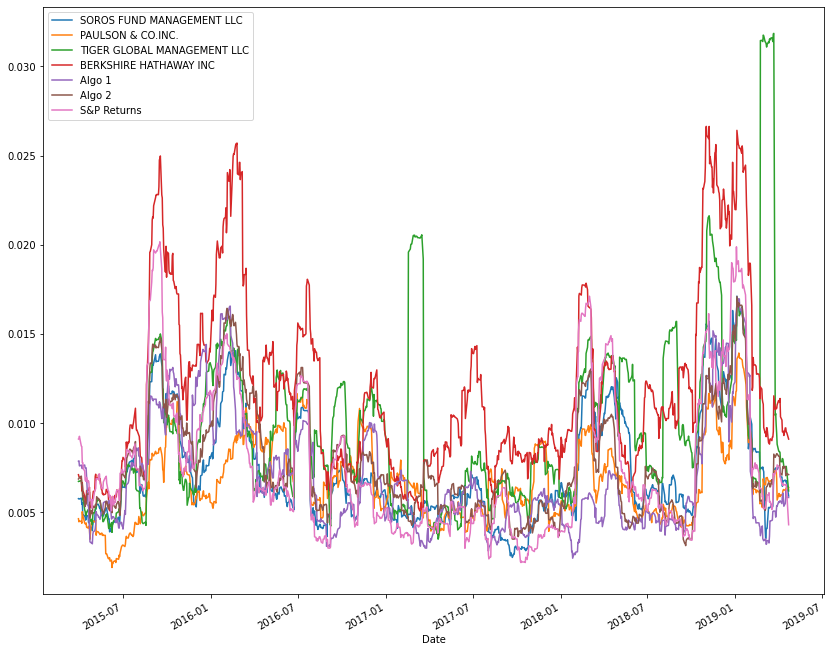

In [50]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_deviation = combined_return.rolling(window=21).std()

# Plot the rolling standard deviation
rolling_deviation.plot(figsize=(14,12))

### Calculate and plot the correlation

In [24]:
# Calculate the correlation
correlation = combined_return.corr()
# Display de correlation matrix
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P Returns
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P Returns,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:xlabel='Date'>

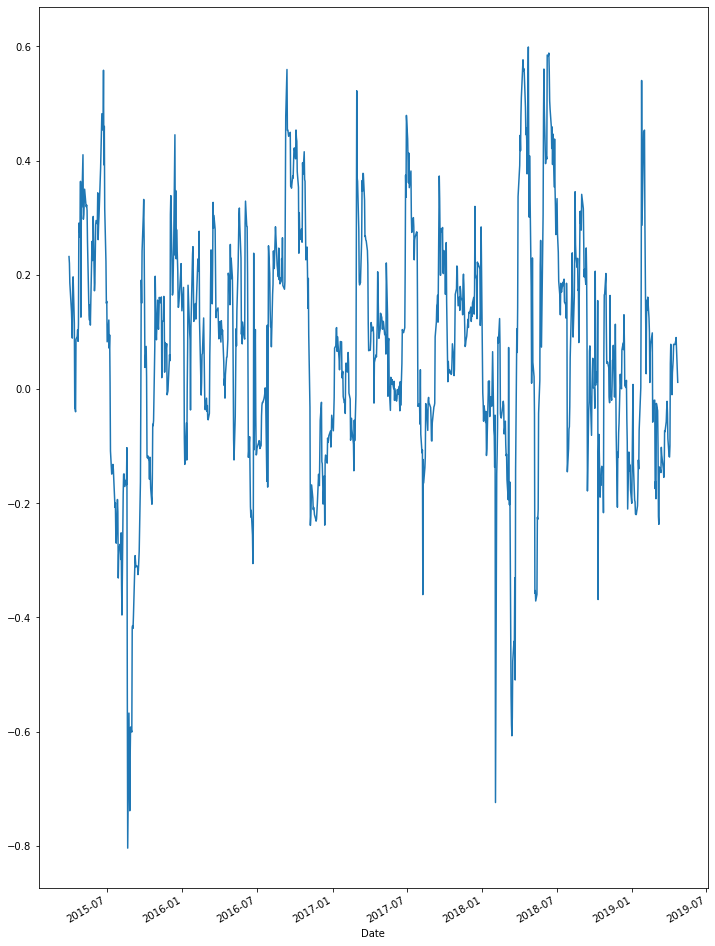

In [52]:
# Calculate covariance of a single portfolio
# Calculate variance of S&P 500
sp500_covariance = combined_return["Algo 2"].rolling(window=21).cov(combined_return["S&P Returns"])
sp500_variance = combined_return["Algo 2"].rolling(window=21).var()

# Computing beta

algo2_beta = sp500_covariance / sp500_variance

# Plot beta trend

algo2_beta.plot(figsize = (12,18))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [ ]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [59]:
# Annualized Sharpe Ratios
sharpe_ratios = combined_return - combined_return / stand_dev_calcs
sharpe_ratios

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P Returns
Date,,,,,,,
2015-03-03,0.159003,0.703938,0.044977,0.501891,0.252840,0.112881,-0.508915
2015-03-04,-0.280174,-0.458117,0.229998,-0.321904,1.118153,-0.287254,0.137930
2015-03-05,-0.504584,-0.576102,-0.213722,-0.513938,0.124335,-0.513965,-1.660003
2015-03-06,0.993256,0.505148,0.769801,1.000782,0.645305,1.362476,0.453625
2015-03-09,-0.073160,-0.597212,-0.530321,0.126259,0.709137,-0.154935,-1.992092
...,...,...,...,...,...,...,...
2019-04-15,0.178662,0.163428,-0.036116,0.801686,0.563874,0.543507,0.058780
2019-04-16,-0.339161,-0.054862,0.075422,-0.063930,0.904111,-0.344702,-0.263121
2019-04-17,0.363956,0.914058,0.400231,-0.246195,1.341063,0.621556,0.182026


<AxesSubplot:xlabel='Date'>

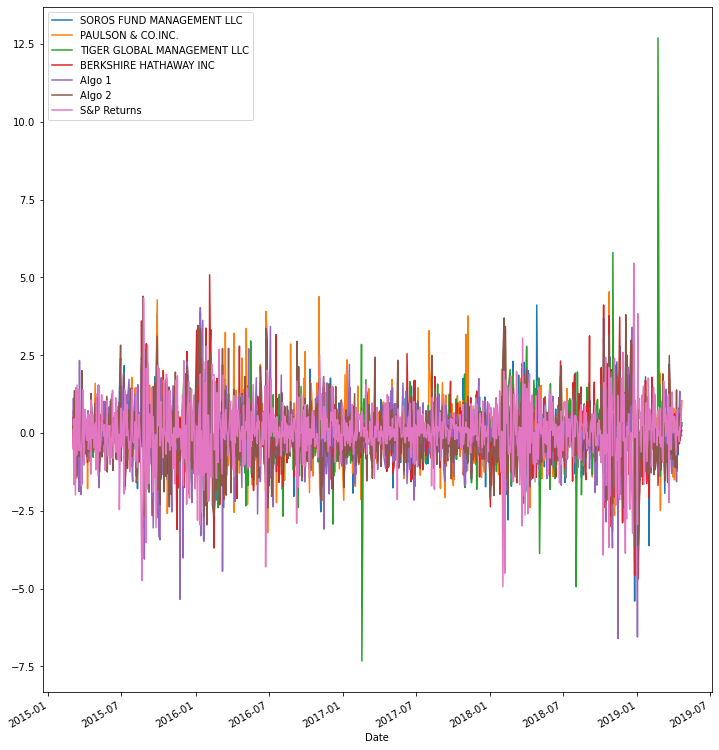

In [62]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(figsize= (12,14))

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

They do not generally - although Tiger Capital appears to outperform, it is also the riskiest.

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [68]:
!pip install yfinance
import yfinance as yf

In [81]:
# Reading data from 1st stock
goog_df = yf.download('GOOG', 
                      start='2020-12-06', 
                      end='2021-12-06', 
                      progress=False,)
goog_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-07,1819.000000,1832.369995,1805.780029,1819.479980,1819.479980,1320900
2020-12-08,1810.099976,1821.900024,1796.204956,1818.550049,1818.550049,1096300
2020-12-09,1812.010010,1834.270020,1767.810059,1784.130005,1784.130005,1507600
2020-12-10,1769.800049,1781.310059,1740.319946,1775.329956,1775.329956,1362800
2020-12-11,1763.060059,1784.449951,1760.000000,1781.770020,1781.770020,1220700


In [72]:
# Reading data from 2nd stock
aapl_df = yf.download('AAPL', 
                      start='2020-12-06', 
                      end='2021-12-06', 
                      progress=False,)
aapl_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-07,122.309998,124.570000,122.250000,123.750000,122.991783,86712000
2020-12-08,124.370003,124.980003,123.089996,124.379997,123.617912,82225500
2020-12-09,124.529999,125.949997,121.000000,121.779999,121.033852,115089200
2020-12-10,120.500000,123.870003,120.150002,123.239998,122.484909,81312200
2020-12-11,122.430000,122.760002,120.550003,122.410004,121.659996,86939800


In [73]:
# Reading data from 3rd stock
cost_df = yf.download('COST', 
                      start='2020-12-06', 
                      end='2021-12-06', 
                      progress=False,)
cost_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-07,374.269989,376.500000,372.649994,373.329987,370.502808,2652900
2020-12-08,373.950012,379.519989,370.750000,377.600006,374.740479,2685500
2020-12-09,379.880005,381.000000,372.799988,374.290009,371.455566,2461600
2020-12-10,374.290009,375.000000,371.559998,372.790009,369.966949,2566300
2020-12-11,379.769989,379.769989,372.540009,375.100006,372.259460,3483900


In [74]:
# Combine all stocks in a single DataFrame
stocks_return = pd.concat([goog_df, aapl_df, cost_df],axis="columns", join="inner")
stocks_return.head()

,Open,High,Low,Close,Adj Close,Volume,Open,High,Low,Close,Adj Close,Volume,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,,,,,,,,,,,,
2020-12-07,1819.000000,1832.369995,1805.780029,1819.479980,1819.479980,1320900,122.309998,124.570000,122.250000,123.750000,122.991783,86712000,374.269989,376.500000,372.649994,373.329987,370.502808,2652900
2020-12-08,1810.099976,1821.900024,1796.204956,1818.550049,1818.550049,1096300,124.370003,124.980003,123.089996,124.379997,123.617912,82225500,373.950012,379.519989,370.750000,377.600006,374.740479,2685500
2020-12-09,1812.010010,1834.270020,1767.810059,1784.130005,1784.130005,1507600,124.529999,125.949997,121.000000,121.779999,121.033852,115089200,379.880005,381.000000,372.799988,374.290009,371.455566,2461600
2020-12-10,1769.800049,1781.310059,1740.319946,1775.329956,1775.329956,1362800,120.500000,123.870003,120.150002,123.239998,122.484909,81312200,374.290009,375.000000,371.559998,372.790009,369.966949,2566300
2020-12-11,1763.060059,1784.449951,1760.000000,1781.770020,1781.770020,1220700,122.430000,122.760002,120.550003,122.410004,121.659996,86939800,379.769989,379.769989,372.540009,375.100006,372.259460,3483900


In [76]:
# Reset Date index
stocks_return.reset_index("Date") 
stocks_return.head()

,Open,High,Low,Close,Adj Close,Volume,Open,High,Low,Close,Adj Close,Volume,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,,,,,,,,,,,,
2020-12-07,1819.000000,1832.369995,1805.780029,1819.479980,1819.479980,1320900,122.309998,124.570000,122.250000,123.750000,122.991783,86712000,374.269989,376.500000,372.649994,373.329987,370.502808,2652900
2020-12-08,1810.099976,1821.900024,1796.204956,1818.550049,1818.550049,1096300,124.370003,124.980003,123.089996,124.379997,123.617912,82225500,373.950012,379.519989,370.750000,377.600006,374.740479,2685500
2020-12-09,1812.010010,1834.270020,1767.810059,1784.130005,1784.130005,1507600,124.529999,125.949997,121.000000,121.779999,121.033852,115089200,379.880005,381.000000,372.799988,374.290009,371.455566,2461600
2020-12-10,1769.800049,1781.310059,1740.319946,1775.329956,1775.329956,1362800,120.500000,123.870003,120.150002,123.239998,122.484909,81312200,374.290009,375.000000,371.559998,372.790009,369.966949,2566300
2020-12-11,1763.060059,1784.449951,1760.000000,1781.770020,1781.770020,1220700,122.430000,122.760002,120.550003,122.410004,121.659996,86939800,379.769989,379.769989,372.540009,375.100006,372.259460,3483900


In [78]:
# Reorganize portfolio data by having a column per symbol
sorted(stocks_return)

['Adj Close',
 'Adj Close',
 'Adj Close',
 'Close',
 'Close',
 'Close',
 'High',
 'High',
 'High',
 'Low',
 'Low',
 'Low',
 'Open',
 'Open',
 'Open',
 'Volume',
 'Volume',
 'Volume']

In [ ]:
# Calculate daily returns

# Drop NAs

# Display sample data


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualzied Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!